In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Set matplotlib styles
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

# Define convolution kernels
edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
blur = np.ones((3, 3)) / 9.0
bottom_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Function to create a circle image
def create_circle(size=(64, 64), val=1.0, r_shrink=4):
    radius = min(size) // r_shrink
    img = np.zeros(size, dtype=np.float32)
    center = (size[0] // 2, size[1] // 2)
    for y in range(size[0]):
        for x in range(size[1]):
            if np.sqrt((x - center[0])**2 + (y - center[1])**2) < radius:
                img[y, x] = val
    return tf.expand_dims(img, axis=-1)

# Load images using OpenCV
image_dir = 'computer_vision_data/'
circle_64 = create_circle((64, 64), val=1.0, r_shrink=4)
kaggle_k = cv2.imread(image_dir + 'k.jpg', cv2.IMREAD_COLOR)
car = cv2.imread(image_dir + 'car_illus.jpg', cv2.IMREAD_COLOR)

# Resize images
car = cv2.resize(car, (200, 200))

# Convert images to TensorFlow tensors
kaggle_k = tf.convert_to_tensor(kaggle_k, dtype=tf.float32)
car = tf.convert_to_tensor(car, dtype=tf.float32)

# Function to display kernels
def show_kernel(kernel, title, digits=2, text_size=20):
    plt.imshow(kernel, cmap='gray')
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            plt.text(j, i, f"{kernel[i, j]:.{digits}f}", 
                     ha='center', va='center', fontsize=text_size, color='white')
    plt.title(title)
    plt.axis('off')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


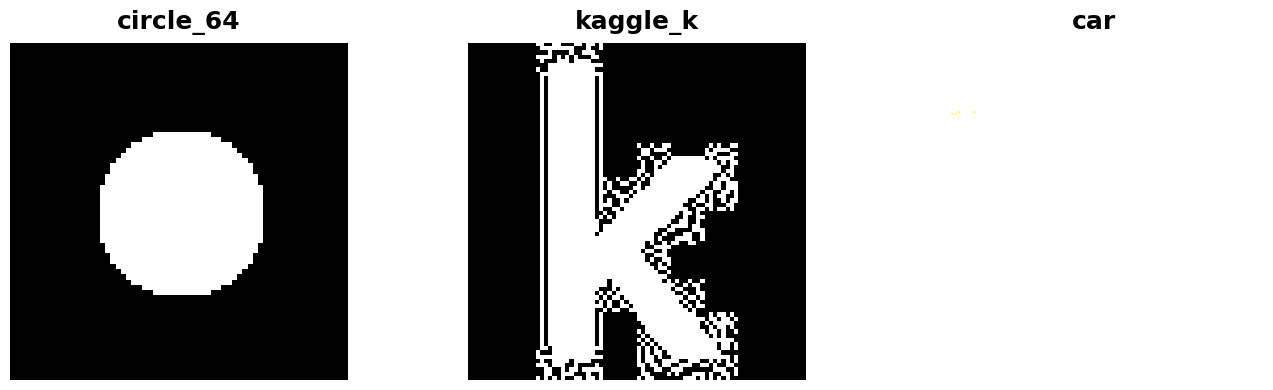

In [9]:

# Display images
images = [(circle_64, "circle_64"), (kaggle_k, "kaggle_k"), (car, "car")]

plt.figure(figsize=(14, 4))
for i, (img, title) in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(tf.squeeze(img), cmap='gray')
    plt.axis('off')
    plt.title(title)
plt.show()


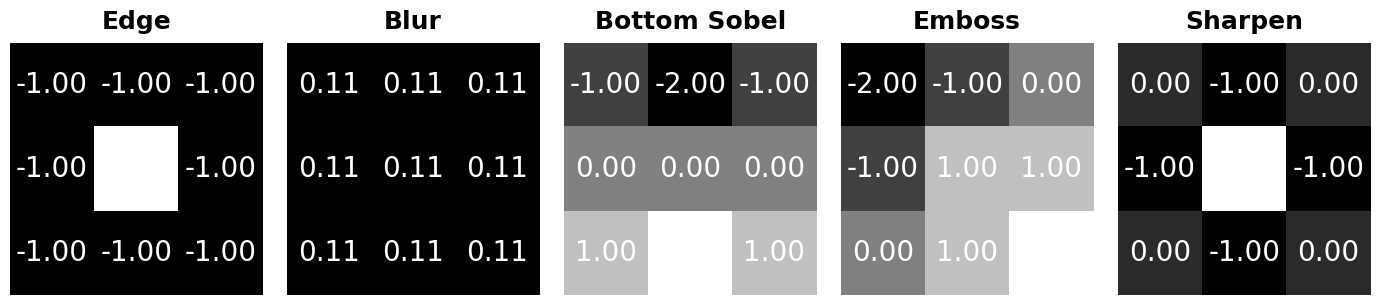

In [10]:

# Display kernels
kernels = [(edge, "Edge"), (blur, "Blur"), (bottom_sobel, "Bottom Sobel"),
           (emboss, "Emboss"), (sharpen, "Sharpen")]

plt.figure(figsize=(14, 4))
for i, (krn, title) in enumerate(kernels):
    plt.subplot(1, len(kernels), i+1)
    show_kernel(krn, title)
plt.show()

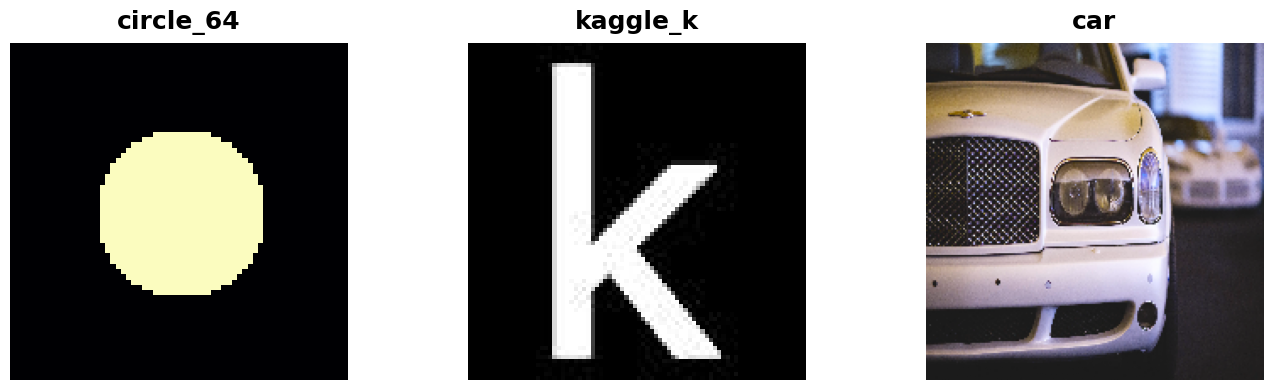

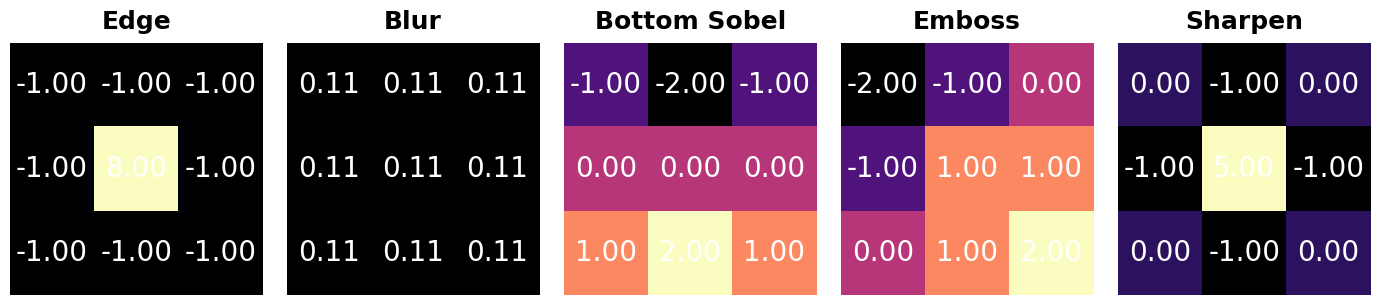

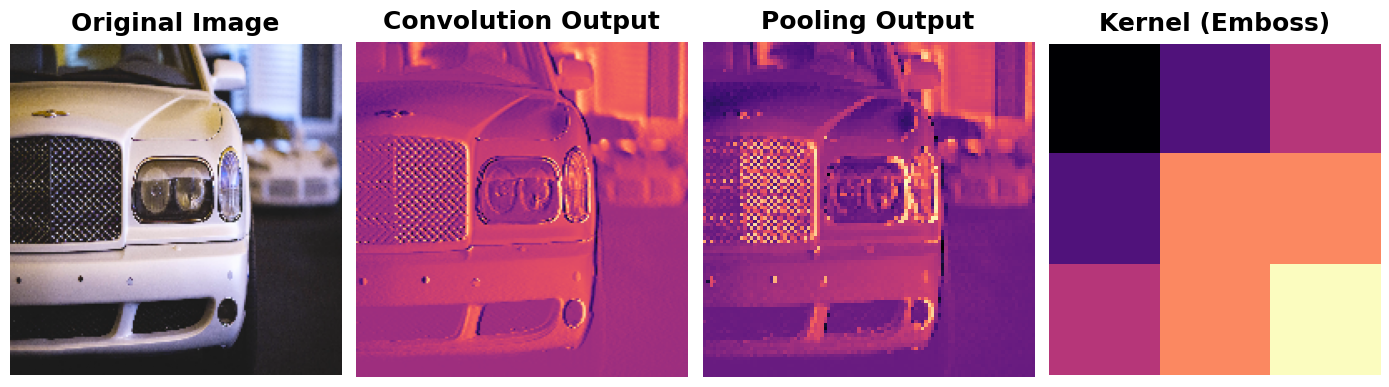

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Set matplotlib styles
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

# Define convolution kernels
edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
blur = np.ones((3, 3)) / 9.0
bottom_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Function to create a circle image
def create_circle(size=(64, 64), val=1.0, r_shrink=4):
    radius = min(size) // r_shrink
    img = np.zeros(size, dtype=np.float32)
    center = (size[0] // 2, size[1] // 2)
    for y in range(size[0]):
        for x in range(size[1]):
            if np.sqrt((x - center[0])**2 + (y - center[1])**2) < radius:
                img[y, x] = val
    return tf.expand_dims(img, axis=-1)  # Adding channel dimension

# Load images using OpenCV
image_dir = 'computer_vision_data/'
circle_64 = create_circle((64, 64), val=1.0, r_shrink=4)
kaggle_k = cv2.imread(image_dir + 'k.jpg', cv2.IMREAD_COLOR)
car = cv2.imread(image_dir + 'car_illus.jpg', cv2.IMREAD_COLOR)

# Resize images
car = cv2.resize(car, (200, 200))

# Convert images to TensorFlow tensors and normalize them to [0, 1]
kaggle_k = tf.convert_to_tensor(kaggle_k, dtype=tf.float32) / 255.0
car = tf.convert_to_tensor(car, dtype=tf.float32) / 255.0

# Function to display kernels
def show_kernel(kernel, title, digits=2, text_size=20):
    plt.imshow(kernel)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            plt.text(j, i, f"{kernel[i, j]:.{digits}f}", 
                     ha='center', va='center', fontsize=text_size, color='white')
    plt.title(title)
    plt.axis('off')

# Display images
images = [(circle_64, "circle_64"), (kaggle_k, "kaggle_k"), (car, "car")]

plt.figure(figsize=(14, 4))
for i, (img, title) in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(tf.squeeze(img))  # No colormap needed for color images
    plt.axis('off')
    plt.title(title)
plt.show() 

# Display kernels
kernels = [(edge, "Edge"), (blur, "Blur"), (bottom_sobel, "Bottom Sobel"),
           (emboss, "Emboss"), (sharpen, "Sharpen")]

plt.figure(figsize=(14, 4))
for i, (krn, title) in enumerate(kernels):
    plt.subplot(1, len(kernels), i+1)
    show_kernel(krn, title)
plt.show() 

# YOUR CODE HERE: choose an image
image = car  # Use the car image

# YOUR CODE HERE: choose a kernel
kernel = emboss

# Apply convolution using TensorFlow
kernel_tf = tf.constant(kernel, dtype=tf.float32)
# No need to repeat the channels for RGB image
conv_output = tf.nn.conv2d(image[tf.newaxis, ...], kernel_tf[tf.newaxis, ..., tf.newaxis], strides=[1, 1, 1, 1], padding='VALID')

# Apply pooling (2x2, stride=2, padding='SAME')
pool_output = tf.nn.max_pool(conv_output, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Plotting function to display results
def plot_extraction(image, conv_output, pool_output, figsize=(14, 6)):
    fig, axs = plt.subplots(1, 4, figsize=figsize)
    
    # Original Image
    axs[0].imshow(tf.squeeze(image))  # No colormap for color images
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Convolution Output
    axs[1].imshow(tf.squeeze(conv_output))  # No colormap for color images
    axs[1].set_title('Convolution Output')
    axs[1].axis('off')
    
    # Pooling Output
    axs[2].imshow(tf.squeeze(pool_output))  # No colormap for color images
    axs[2].set_title('Pooling Output')
    axs[2].axis('off')
    
    # Show Kernel
    axs[3].imshow(kernel)
    axs[3].set_title('Kernel (Emboss)')
    axs[3].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display the convolution and pooling extraction
plot_extraction(image, conv_output, pool_output)
